## Public vs. Private Classifier for W1

In [1]:
import pandas as pd
from tqdm import tqdm_notebook
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt
import seaborn as sns

In [2]:
data = pd.read_csv('pub-pri-gt1.csv')

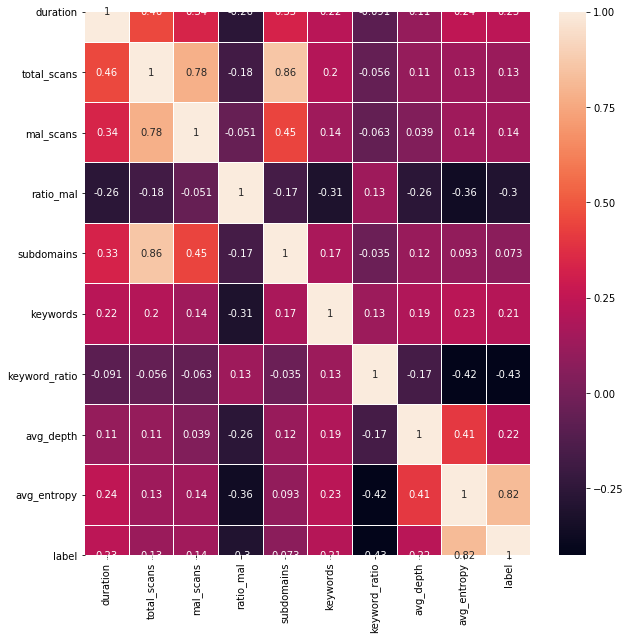

In [3]:
df = data[['duration', 'total_scans', 'mal_scans', 'ratio_mal',
       'subdomains', 'keywords', 'keyword_ratio', 'avg_depth', 'avg_entropy',
       'label']]
plt.figure(figsize=(10,10))
# sns.set(font_scale=1)
sns.heatmap(df.corr(), annot = True ,linewidths=.05)
plt.savefig('public_private_classifier_gt1_corr.png')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data[['duration', 'total_scans', 'mal_scans', 'ratio_mal',
       'subdomains', 'keywords', 'keyword_ratio', 'avg_depth', 'avg_entropy',
       ]], data.label, test_size = 0.20, random_state = 0)

import warnings
warnings.filterwarnings("ignore")


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.metrics import confusion_matrix

classifiers=[['Logistic Regression :',LogisticRegression()],
       ['Decision Tree Classification :',DecisionTreeClassifier()],
       ['Gradient Boosting Classification :', GradientBoostingClassifier()],
       ['Ada Boosting Classification :',AdaBoostClassifier()],
       ['Extra Tree Classification :', ExtraTreesClassifier()],
       ['K-Neighbors Classification :',KNeighborsClassifier()],
       ['Support Vector Classification :',SVC()],
       ['RandomForestClassifier : ',RandomForestClassifier()],      
      ]
cla_pred=[]
for name,model in classifiers:
    model=model
    model.fit(X_train,Y_train)
    predictions = model.predict(X_test)
    cla_pred.append(accuracy_score(Y_test,predictions))
    print(name,accuracy_score(Y_test,predictions),' precision : ',precision_score(Y_test,predictions),' recall : ',recall_score(Y_test,predictions))

Logistic Regression : 0.7560975609756098  precision :  0.8979591836734694  recall :  0.5569620253164557
Decision Tree Classification : 0.9146341463414634  precision :  0.891566265060241  recall :  0.9367088607594937
Gradient Boosting Classification : 0.926829268292683  precision :  0.9135802469135802  recall :  0.9367088607594937
Ada Boosting Classification : 0.8963414634146342  precision :  0.8690476190476191  recall :  0.9240506329113924
Extra Tree Classification : 0.9207317073170732  precision :  0.8837209302325582  recall :  0.9620253164556962
K-Neighbors Classification : 0.7621951219512195  precision :  0.7380952380952381  recall :  0.7848101265822784
Support Vector Classification : 0.6219512195121951  precision :  0.5620437956204379  recall :  0.9746835443037974
RandomForestClassifier :  0.926829268292683  precision :  0.9135802469135802  recall :  0.9367088607594937


In [5]:
RFC = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV

n_estimators = list(range(1,2001,100))
max_depth = list(range(1,2001,100))

hyperparameters = dict(max_depth=max_depth, n_estimators=n_estimators)
h_rfmodel = GridSearchCV(RFC, hyperparameters, cv=5,n_jobs=50, verbose=1)

best_logmodel=h_rfmodel.fit(X_train,Y_train)

print('Best Estimators:', best_logmodel.best_estimator_.get_params()['n_estimators'])
print('Best Max Depth:', best_logmodel.best_estimator_.get_params()['max_depth'])

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=50)]: Using backend LokyBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 tasks      | elapsed:   12.4s
[Parallel(n_jobs=50)]: Done 350 tasks      | elapsed:   42.4s
[Parallel(n_jobs=50)]: Done 700 tasks      | elapsed:  1.9min
[Parallel(n_jobs=50)]: Done 1150 tasks      | elapsed:  3.4min
[Parallel(n_jobs=50)]: Done 1700 tasks      | elapsed:  5.2min
[Parallel(n_jobs=50)]: Done 2000 out of 2000 | elapsed:  6.3min finished


Best Estimators: 1801
Best Max Depth: 1


In [6]:
RFC = RandomForestClassifier(max_depth=1, n_estimators=801)
RFC.fit(X_train,Y_train)
predictions_RFC = RFC.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

print('Random Forest',accuracy_score(Y_test,predictions_RFC),' precision : ',precision_score(Y_test,predictions_RFC),' recall : ',recall_score(Y_test,predictions_RFC),'\n')
print(classification_report(Y_test,predictions_RFC))

Random Forest 0.9207317073170732  precision :  0.875  recall :  0.9746835443037974 

              precision    recall  f1-score   support

           0       0.97      0.87      0.92        85
           1       0.88      0.97      0.92        79

    accuracy                           0.92       164
   macro avg       0.92      0.92      0.92       164
weighted avg       0.93      0.92      0.92       164



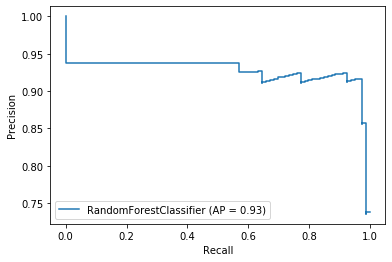

In [8]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(RFC, X_test, Y_test)

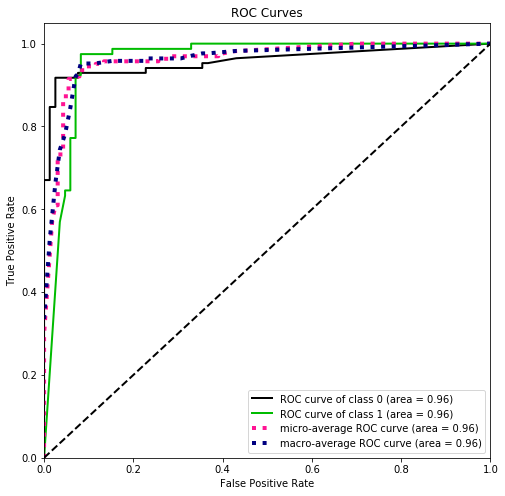

In [9]:
false_positive_rate_RFC, true_positive_rate_RFC, thresholds_RFC = roc_curve(Y_test,RFC.predict_proba(X_test)[:,1])
skplt.metrics.plot_roc_curve(Y_test.values,RFC.predict_proba(X_test), figsize = (8,8))
plt.savefig('public_private_classifier_gt1_rf_roc.png')
plt.show()

Feature ranking:
1. feature 8 - avg_entropy (0.29213483146067415)
2. feature 4 - subdomains (0.2846441947565543)
3. feature 7 - avg_depth (0.16729088639200998)
4. feature 1 - total_scans (0.13108614232209737)
5. feature 2 - mal_scans (0.062421972534332085)
6. feature 0 - duration (0.04369538077403246)
7. feature 6 - keyword_ratio (0.018726591760299626)
8. feature 5 - keywords (0.0)
9. feature 3 - ratio_mal (0.0)


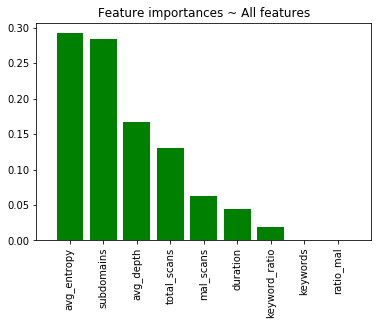

In [10]:
import numpy as np
importances = RFC.feature_importances_
std = np.std([RFC.feature_importances_ for tree in RFC.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
Feature = ['duration', 'total_scans', 'mal_scans', 'ratio_mal',
       'subdomains', 'keywords', 'keyword_ratio', 'avg_depth', 'avg_entropy',
       ]
for f in range(X_train.shape[1]):
    print("{}. feature {} - {} ({})" .format(f + 1, indices[f], Feature[indices[f]], importances[indices[f]]))
indiceX = [Feature[i] for i in indices]
plt.figure()
plt.title("Feature importances ~ All features")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indiceX, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.savefig('public_private_classifier_rf_feature_importances.png')
plt.show()

In [11]:
import pickle
pickle.dump(RFC,open('public_private_classifier_gt1_rf.pickle','wb'))

In [12]:
ETC = ExtraTreesClassifier()
from sklearn.model_selection import GridSearchCV

n_estimators = list(range(1,2001,100))
# max_depth = list(range(1,2001,100))

hyperparameters = dict(n_estimators=n_estimators)
h_rfmodel = GridSearchCV(ETC, hyperparameters, cv=5,n_jobs=200, verbose=1)

best_logmodel=h_rfmodel.fit(X_train,Y_train)

print('Best Estimators:', best_logmodel.best_estimator_.get_params()['n_estimators'])
# print('Best Max Depth:', best_logmodel.best_estimator_.get_params()['max_depth'])

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=200)]: Using backend LokyBackend with 200 concurrent workers.
[Parallel(n_jobs=200)]: Done   4 out of 100 | elapsed:    6.4s remaining:  2.6min
[Parallel(n_jobs=200)]: Done 100 out of 100 | elapsed:   19.5s finished


Best Estimators: 101


In [13]:
ETC = ExtraTreesClassifier(n_estimators=101)
ETC.fit(X_train,Y_train)
predictions_RFC = RFC.predict(X_test)

In [14]:
print('Extra Trees Classifier',accuracy_score(Y_test,predictions_RFC),' precision : ',precision_score(Y_test,predictions_RFC),' recall : ',recall_score(Y_test,predictions_RFC),'\n')
print(classification_report(Y_test,predictions_RFC))

Extra Trees Classifier 0.9207317073170732  precision :  0.875  recall :  0.9746835443037974 

              precision    recall  f1-score   support

           0       0.97      0.87      0.92        85
           1       0.88      0.97      0.92        79

    accuracy                           0.92       164
   macro avg       0.92      0.92      0.92       164
weighted avg       0.93      0.92      0.92       164



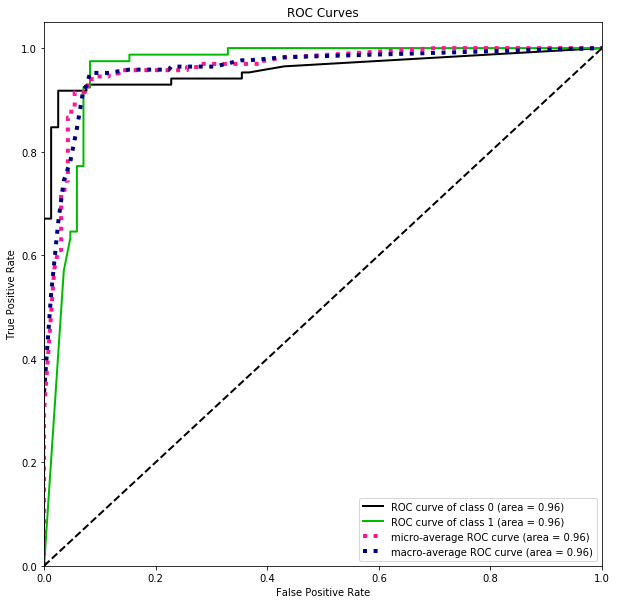

In [15]:
false_positive_rate_RFC, true_positive_rate_RFC, thresholds_RFC = roc_curve(Y_test,RFC.predict_proba(X_test)[:,1])
skplt.metrics.plot_roc_curve(Y_test.values,RFC.predict_proba(X_test), figsize = (10,10))
plt.savefig('public_private_classifier_gt1_et_roc.png')
plt.show()

Feature ranking:
1. feature 8 - avg_entropy (0.29213483146067415)
2. feature 4 - subdomains (0.2846441947565543)
3. feature 7 - avg_depth (0.16729088639200998)
4. feature 1 - total_scans (0.13108614232209737)
5. feature 2 - mal_scans (0.062421972534332085)
6. feature 0 - duration (0.04369538077403246)
7. feature 6 - keyword_ratio (0.018726591760299626)
8. feature 5 - keywords (0.0)
9. feature 3 - ratio_mal (0.0)


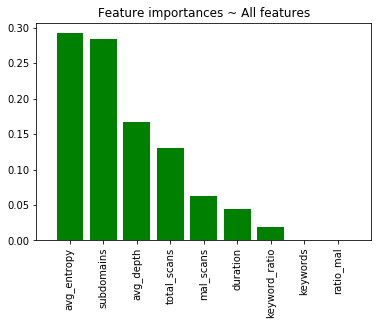

In [16]:
import numpy as np
importances = RFC.feature_importances_
std = np.std([RFC.feature_importances_ for tree in RFC.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
Feature = ['duration', 'total_scans', 'mal_scans', 'ratio_mal',
       'subdomains', 'keywords', 'keyword_ratio', 'avg_depth', 'avg_entropy',
       ]
for f in range(X_train.shape[1]):
    print("{}. feature {} - {} ({})" .format(f + 1, indices[f], Feature[indices[f]], importances[indices[f]]))
indiceX = [Feature[i] for i in indices]
plt.figure()
plt.title("Feature importances ~ All features")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indiceX, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.savefig('public_private_classifier_rf_feature_importances.png')
plt.show()